# Project 3 - Web APIs & NLP

## Part Three : Preprocessing & Modelling

### Contents:

* Import Librairies
* Load merged data
* Preprocessing
    - Mapping the y Variable
    - NLP Preprocessing
        - Lemmatization
        - Stemming
        - Stopwords
        - Outcomes from NLP Preprocessing
    - Creating X feature and y
    - Train-test Split
    - Determing the Baseline Score
* Modeling
    - Logistic Regression Model
        - LR: Confusion Matrix
        - LR: Interpretation
    - Bernoulli NB Model
        - NB: Confusion Matrix
        - NB: Interpretation
    - Bagged Decision Tree
        - BDT: Confusion Matrix
        - BDT: Interpretation
    - Random Forest Model
        - RF: Confusion Matrix
        - RF: Interpretation
* Conclusion and Recommendations

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#graphing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#using nlp 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 

#modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

#interpretation on the models 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### Load merged data

In [3]:
subreddit = pd.read_csv('./datasets/subreddit_combined.csv')

Check if data is loaded

In [4]:
subreddit.head()

,title,author,created_utc,selftext,subreddit
0,Do you have any advice for the soon to be newl...,dreamingonastar1,1658560509,I learn more and more every day about the pers...,mbti
1,Tp type personality pattern (ex:soccer),Real_Marsupial8984,1658560467,Estp: Experience (Se) first and then create yo...,mbti
2,May Pang,depressedgod13,1658559322,John Lennon’s temporary beau.\n\n[View Poll](h...,mbti
3,Which type is the most “neutral” on their beli...,Hydra-Sagaria,1658558060,\n\n[View Poll](https://www.reddit.com/poll/w5...,mbti
4,Does this seem Si dom?,akuasrA,1658557876,Do these traits seem to fit with the definitio...,mbti


#### Remove unnecessary column as we only need title and subreddit for our model

In [5]:
subreddit=subreddit.drop(['created_utc','author','selftext'],axis=1)

Let's check if it works

In [6]:
subreddit.head()

,title,subreddit
0,Do you have any advice for the soon to be newl...,mbti
1,Tp type personality pattern (ex:soccer),mbti
2,May Pang,mbti
3,Which type is the most “neutral” on their beli...,mbti
4,Does this seem Si dom?,mbti


### Preprocessing

Before modeling, I need to do some preparation. First, I need to do addtional NLP prepocessing on my merged dataset to detemine if I want to use it in my modeling. Then, I create our X feature and y. Then, I will detemine the baseline. Lastly, do train-test split on the X fetaure and y.

#### Mapping the y Variable
I change the target variable to a binary classifier so that it can be able to model it as a classification model.

In [7]:
#Using the replace method to fix target values in the subreddits_titles data set
subreddit['subreddit'].replace({'mbti': 1, 'astrology': 0}, inplace = True)

In [8]:
subreddit['subreddit'].value_counts()

0    1779
1    1325
Name: subreddit, dtype: int64

The target variable has been successfully changed.

#### NLP Preprocessing
When dealing with text data, there are common pre-processing steps. I will tokenize, lemmatize, and stem. I will also use stopwords to clean up our text data. Finally, I can use two of these functions and use the results to model. I will either pick lemmatization and stopwords or stemming and stopwords.

Lets create the text data and call it token.

In [9]:
#getting our text data and using the copy method to unchange our dataframe feature 
token = subreddit['title'].copy()

**Lemmatization**

When I lemmatize the text data, I take words in the data and attempt to return their base form of that word. Before I lemmatize, I need to tokenize the data. In other words, it will split up the data into distinct chunks based on a pattern of our choosing.

In [10]:
#Instantiate tokenizer
tokenizer = RegexpTokenizer(r'[A-z]+') #using the [A-z] pattern

In [11]:
#Run tokenizer, use join method to get our post to become lowercase
#Created with Noah C. 
tokens = [" ".join(tokenizer.tokenize(post.lower())) for post in token]

In [12]:
#see if it worked
tokens[:2]

['do you have any advice for the soon to be newly weds intj lt isfp',
 'tp type personality pattern ex soccer']

It works, so let's move on to use lemmatization

In [13]:
#Instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [14]:
#use the split method to split our posts and lemmatize individual words in each post 
#Created with Noah C. 
tokens_lem = [[lemmatizer.lemmatize(word) for word in post.split(' ')] for post in tokens]

In [15]:
#to see the differences between tokens and lemmatize tokens 
list(zip(tokens, tokens_lem))[:2]

[('do you have any advice for the soon to be newly weds intj lt isfp',
  ['do',
   'you',
   'have',
   'any',
   'advice',
   'for',
   'the',
   'soon',
   'to',
   'be',
   'newly',
   'wed',
   'intj',
   'lt',
   'isfp']),
 ('tp type personality pattern ex soccer',
  ['tp', 'type', 'personality', 'pattern', 'ex', 'soccer'])]

In [16]:
#lemmatize tokens, use the join method to get our post to become lemmatize
#Created with Noah C.
lem_tokens = [" ".join(post) for post in tokens_lem]

Next, CountVectorizer is used to transform the lists of the cleaned posts into features that we can pass into a model.

In [17]:
#Instantiate CountVectorizer
cvec = CountVectorizer()

In [18]:
#fit lemmatize features 
cvec.fit_transform(lem_tokens);

In [19]:
#Get feature names
vocab_lemma = cvec.get_feature_names()

In [20]:
#create a new dataframe with our data lemmatize
vocab_lemma_df = pd.DataFrame(vocab_lemma)

In [21]:
#checking to see if it worked 
vocab_lemma_df.head()

,0
0,_____
1,aaron
2,ab
3,abducting
4,abe


I am able to lemmatize our X feature. Next, it is to stem X feature and it is very similar to lemmatization

**Stemming**

Again, when I stem the text data, I take words in the data and attempt to return their base form of that word. Also, before stemming, we need to tokenize our data.


In [22]:
#Instantiate object of class PorterStemmer.
p_stemmer = PorterStemmer()

In [23]:
#Stem tokens, use the split method to split our posts and stem individual words in each post 
#Created with Noah C.
tokens_stem = [[p_stemmer.stem(word) for word in post.split(' ')] for post in tokens]


In [24]:
#show the differences between tokens and stemmed tokens 
list(zip(tokens, tokens_stem))[:2]

[('do you have any advice for the soon to be newly weds intj lt isfp',
  ['do',
   'you',
   'have',
   'ani',
   'advic',
   'for',
   'the',
   'soon',
   'to',
   'be',
   'newli',
   'wed',
   'intj',
   'lt',
   'isfp']),
 ('tp type personality pattern ex soccer',
  ['tp', 'type', 'person', 'pattern', 'ex', 'soccer'])]

In [25]:
#stemmed tokens, use the join method to get our post to become stemmed
#Created with Noah C.
stemmed_tokens = [" ".join(post) for post in tokens_stem]

Again, CountVectorizer is used.

In [26]:
#Instantiate CountVectorizer
cvec = CountVectorizer()

In [27]:
#fit stem features 
cvec.fit_transform(stemmed_tokens);

In [28]:
#Get feature names
vocab_stemmed = cvec.get_feature_names()

In [29]:
#create a new dataframe with our data lemmatize
vocab_stemmed_df = pd.DataFrame(vocab_stemmed)

In [30]:
#check to see if it worked 
vocab_stemmed_df.head()

,0
0,_____
1,aaron
2,ab
3,abduct
4,abe


I am able to stem our X feature.

Thus, we observed that stemming is better than lemmatization because it is able to get the clear root word in our dataset. For instance, in lemmatization we get the word "abducting" and in stemming we get the word "abduct". 

Finally, we can determine our stop words that will not be included into our model.

**Stopwords**

Stopwords are very common words that are often removed because they amount to unnecessary information and removing them can dramatically speed things up in our modeling.

In [31]:
#english stopwords are the common stop words in english
stop = stopwords.words('english')

In [32]:
#lets create another copy of our dataframe so it will not effect our modeling
copy_st = subreddit.copy()

In [33]:
#changing our title feature to a lower case and split the posts into indvidual words
copy_st['title'] = copy_st['title'].str.lower().str.split()  

In [34]:
#see if it worked
copy_st['title'][2]


['may', 'pang']

In [35]:
#Checking if each word is either a stopword or not, if then drop word, if not keep word
using_stop_words = copy_st['title'].apply(lambda post: [word for word in post if word not in stop])


In [36]:
#creating a dataframe with stopwords gone
using_stop_words_df = pd.DataFrame(using_stop_words)


In [37]:
#check to see if it worked
using_stop_words_df.head()

,title
0,"[advice, soon, newly, weds?, intj, &lt;3, isfp]"
1,"[tp, type, personality, pattern, (ex:soccer)]"
2,"[may, pang]"
3,"[type, “neutral”, beliefs, life?]"
4,"[seem, si, dom?]"


I am able to determine our stopwords our X feature.

After exploring each of the NLP functions, we will use lemmatisation and stopwords for our model. As mentioned, stemming would be better in general but for my case, stemming have removed most of the 'e' from my words and made most of my words unreadable, like advice to advic. 

**Outcomes from NLP Preprocessing**

Lets create our lemmatise X feature for our model.

In [38]:
#Getting our text data in our dataframe
token_model = subreddit['title']

In [39]:
#Instantiate tokenizer
tokenizer_model = RegexpTokenizer(r'[A-z]+')

In [40]:
#Run tokenizer, use join method to get our post to become lowercase
#Created with Noah C. 
tokens_model = [" ".join(tokenizer_model.tokenize(post.lower())) for post in token_model]

In [41]:
#Instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [42]:
#use the split method to split our posts and lemmatize individual words in each post 
#Created with Noah C. 
tokens_lem_model= [[lemmatizer.lemmatize(word) for word in post.split(' ')] for post in tokens]

In [43]:
#lemmatize tokens, use the join method to get our post to become lemmatize
#Created with Noah C.
lem_tokens_model = [" ".join(post) for post in tokens_lem]

In [44]:
#replace our text data with new lemmatized data
subreddit['title'] = lem_tokens_model

In [45]:
#check to see if it worked
subreddit.head(30)

,title,subreddit
0,do you have any advice for the soon to be newl...,1
1,tp type personality pattern ex soccer,1
2,may pang,1
3,which type is the most neutral on their belief...,1
4,doe this seem si dom,1
5,i want an infj best friend female,1
6,abrasiveness and the perceiving ax,1
7,which type have you noticed isfj s tend to end...,1
8,which type is more likely to be the victim of ...,1
9,what do you think,1


lemmatise X feature is created and going to be using in the model.

Next, lets state the X feature and target variable.

### Creating X feature and y
Create our feature matrix (X) and target vector (y):

In [46]:
X = subreddit['title']
y = subreddit['subreddit']

### Train-test Split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [48]:
#check to see if it worked 
X_test.head()

3057                          chart ruler in the th house
707                    which type hate ambiguity the most
2434                            capricorn woman virgo man
968     never be able to say i love you v never hear i...
886     i m an entj and i don t know how to have fun a...
Name: title, dtype: object

Finally, we can determine our baseline score.

### Determing the Baseline Score
The baseline score is actually an accuracy score. It is the percentage of the majority class, regardless of whether our y is 1 or 0. It will serve as the benchmark for our classification models to beat.

In [49]:
y_test.value_counts(normalize = True)

0    0.572683
1    0.427317
Name: subreddit, dtype: float64

The majority class end up being r/astrology = 0 because this subreddit has more posts included in y. Therefore, our baseline accuracy is about 0.57. And each time we see a post, it is predicted to be r/astrology.

Let's move on to modelling!

### Modeling
I am going to use four different classification models to determine how accurate it is towards our problem statement with it's accuracy score. We will model: Logistic Regression, Bernoulli Naive Bayes, Bagged Decision Tree, and Random Forest.

For Logistic Regression and Bernoulli Naive Bayes, we will use TfidfVectorizer as a transformer. TfidfVectorizer is another classification model that penalizes words in our dataset that are common across all posts in the corpus.

I determine parameters for Logistic Regression and Random Forest models. A parameter sets the conditions of its models.

Additionally, I need to transform our Logistic Regression and Random Forest models to GridSearchCV model. GridSearchCV helps us tune our parameters.

Then I will supplement each model with there repected confusion matrix. Based on the confusion matrix, I am able to determine what was correctly classified and misclassified. This is important because it determines the second half of our problem statement. In other words, we want to see if each model can correctly classify where each post came from in the dataset.

#### Logistic Regression Model
Logistic regression is the most common binary classification algorithm. The goal of our logistic regression model is to describe the relationship between our binary outcome which is our target variable and an independent variable which is our X feature.

We will begin by instantiating a pipeline with TfidfVectorizer and LogisticRegression. Then, we will determine our parameters for our pipeline. Then, we will transform our model to a GridSearchCV. Then, we will fit our training dataset. Finally, we will able to get our training and testing accuracy scores.

For our supplemental piece, we will create a confusion matrix.

Instantiatie Pipeline with TfidfVectorizer() & LogisticRegression()

In [50]:
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer()), 
    ('lr', LogisticRegression(solver = 'liblinear', #making sure we have our slover as liblinear
                              random_state = 42))#creating the random state as 42
])

Using the .get_params attribute, I am able to get the parameters for this pipeline

In [51]:
#got our parameters by trial and error
pipe_params = {
    'vectorizer__max_features': [1000, 2500, 5000], #include the 𝑁 most popular vocabulary words in the corpus
    'vectorizer__ngram_range': [(1,1), (1,2)],#capture 𝑛 -word phrases
    "vectorizer__norm":         ['l1', 'l2'],#using Lasso and Ridge 
    "vectorizer__stop_words":   ['english'],#taking away the english stopwords
    'lr__penalty':              ['l1', 'l2'],#using Lasso and Ridge 
    'lr__C':                    [2.0],#Inverse of regularization strength
    
}

Transform to GridSearchCV

In [52]:
gs = GridSearchCV(pipe, #use the data which is pipe
                  param_grid = pipe_params, #using our custom parameters
                  cv = 5)#cv 5 times

Fit the model

In [53]:
gs.fit(X_train, y_train);

/Users/guiwaisiong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/guiwaisiong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Obtaining the best estimator and parameters

In [54]:
print(gs.best_score_) 
gs.best_params_

0.920625579240037


{'lr__C': 2.0,
 'lr__penalty': 'l2',
 'vectorizer__max_features': 1000,
 'vectorizer__ngram_range': (1, 2),
 'vectorizer__norm': 'l2',
 'vectorizer__stop_words': 'english'}

The best model estimator is about 0.920.

In [55]:
#Save best model as gs_model.
gs_model = gs.best_estimator_

**Accuracy training score**

In [56]:
gs_model.score(X_train, y_train)

0.963924963924964

The accuracy score on our training data set is about 0.963.

**Accuracy testing score**

In [57]:
gs_model.score(X_test, y_test)

0.9307317073170732

The accuracy score on our testing data set is about 0.93.

Next, lets create our confusion matrix.

#### LR: Confusion Matrix
The confusion matrix we will create our true values and predicted values.

Getting our testing predictions

In [58]:
preds_test = gs.predict(X_test)

In [59]:
cm = confusion_matrix(y_test, # True values.
                 preds_test)  # Predicted values.

In [60]:
#create a data frame for cm
pd.DataFrame(data = cm, 
             columns = ['Predicted MBTI', 'Predicted Astrology'],
             index = ['Actual MBTI', 'Actual Astrology'])

,Predicted MBTI,Predicted Astrology
Actual MBTI,571,16
Actual Astrology,55,383


Based on the confusion matrix, we was able to determine that out of 1025 posts, 571 + 383 = 954 posts were correctly classified and 55 + 16 = 71 posts were misclassified.

Finally, lets move on to our interpretation.

#### LR: Interpretation
Metrics:

The training accuracy score is about 96.3 percent.

The testing accuracy score is about 93 percent.

The correctly classified posts is 954.

The misclassified posts is 71.

The training accuracy score is well with our training dataset. The RMSE of our training data has tiny amounts of residuals away from our target variable. Therefore, base on our testing accuracy score, this model will be able to fit well with unknown data if we still use these two subreddit sites.


Next, lets model bernoulli nb.

#### Bernoulli NB Model
Bernoulli Naive Bayes is appropriate when our features are all 0/1 variables which is our target variable. We use this model because it's a very fast modeling algorithm and outperforms more complicated models.

I will first use the transformer TfidfVectorizer. Then I will create a new dataframe with our transformer that is the bag of words. A bag of words represents discard grammar, order, and structure in the text but track occurrences. Then, I will use our transformer as our X_train and X_test. Then, I can finally instantiatie our BernoulliNB. Then, I will fit our training dataset. Finally, I will able to get our training and testing accuracy scores.

For supplemental piece, I will also create a confusion matrix.

Transformer is TfidfVectorizer

In [61]:
tvec = TfidfVectorizer()

Bag of words

In [62]:
#creating bag of words with dataframe 
data = pd.DataFrame(tvec.fit_transform(X_train).toarray(), #able to have strings into floats
                  columns=tvec.get_feature_names())#make column names with data


In [63]:
#checking to see if it worked
data.head()

,_____,aaron,ab,abducting,ability,able,aboard,about,absolutely,absorbed,...,yourself,yourselves,youtube,youtuber,youtubers,yr,yt,zodiac,zodiacal,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Transformer training and testing feature

In [64]:
X_train = tvec.transform(X_train)

X_test = tvec.transform(X_test)

Instantiatie the model

In [65]:
br = BernoulliNB()

Fit the model

In [66]:
br.fit(X_train, y_train);


**Accuracy testing score**

In [67]:
br.score(X_test, y_test)

0.9473170731707317

The accuracy score on our testing data set is about 0.947.

**Accuracy training score**

In [68]:
br.score(X_train, y_train)

0.9788359788359788

The accuracy score on our training data set is about 0.978.

Next, lets create our confusion matrix.

#### NB: Confusion Matrix
Getting our testing predictions

In [69]:
preds_test_1 = br.predict(X_test)

In [70]:
cm_1 = confusion_matrix(y_test, # True values.
                 preds_test_1)  # Predicted values.

In [71]:
#create a data frame for cm_1
pd.DataFrame(data = cm_1, 
             columns = ['Predicted MBTI', 'Predicted astrology'],
             index = ['Actual MBTI', 'Actual Astrology'])

,Predicted MBTI,Predicted astrology
Actual MBTI,566,21
Actual Astrology,33,405


Based on the confusion matrix, we was able to determine that out of 1025 posts, 971 posts were correctly classified and 54 posts were misclassified.

Finally, lets move on to our interpretation.

#### NB: Interpretation
Metrics:

The training accuracy score is about 97.4 percent.

The testing accuracy score is about 94.8 percent.

The correctly classified posts is 971.

The misclassified posts is 54.

The training accuracy score fits really well with our training dataset. The RMSE of our training data has small amount of residuals away from our target variable. Therefore, base on our testing accuracy score, this model will be able to fit well with unknown data if we still use these two subreddit sites.

Next, lets model bagged decision tree.



#### Bagged Decision Tree
Decision trees have limitations. In particular, trees that are grown very deep tend to learn highly irregular patterns. Thus, we will be using a Bagged Decision Tree Model. BDT fixes this problem by exposing different trees to different sub-samples of the training set.
 
First I instantiate the BaggingClassifier. Then, I will fit in training. Finally, I able to get our training and testing accuracy scores.

For supplemental piece, I will also create a confusion matrix.

Instantiate BaggingClassifier.

In [72]:
bag = BaggingClassifier(random_state = 42)#using random state 42

Fit the model

In [73]:
bag.fit(X_train, y_train);

Accuracy training score

In [74]:
bag.score(X_train, y_train)

0.9913419913419913

The accuracy score on our training data set is about 0.991.

Accuracy testing score

In [75]:
bag.score(X_test, y_test)

0.895609756097561

The accuracy score on our testing data set is about 0.895.

Next, lets create our confusion matrix.

#### BDT: Confusion Matrix
Getting our testing predictions

In [76]:
preds_test_3 = bag.predict(X_test)

In [77]:
cm_3 = confusion_matrix(y_test, # True values.
                 preds_test_3)  # Predicted values.

In [78]:
#create a data frame for cm_3
pd.DataFrame(data = cm_3, 
             columns = ['Predicted MBTI', 'Predicted astrology'],
             index = ['Actual MBTI', 'Actual Astrology'])

,Predicted MBTI,Predicted astrology
Actual MBTI,564,23
Actual Astrology,84,354


Based on the confusion matrix, we was able to determine that out of 1025 posts, 918 posts were correctly classified and 107 posts were misclassified.

Finally, lets move on to our interpretation.

#### BDT: Interpretation

Metrics:

The training accuracy score is about 99.1 percent.

The testing accuracy score is about 89.5 percent.

The correctly classified posts is 918.

The misclassified posts is 107.

The training accuracy score fits extremely well with our training dataset. The RMSE of our training data has small amount of residuals away from our target variable. The testing accuracy score fits less with our training data. And the RMSE of our testing data has more residuals away from our target variable.


Finally, lets model random forest.

#### Random Forest Model
Random Forest are very similar to Bagged Decision Trees. Yet, the difference is only a subset of features are selected at random out of the total. In other words, the best split feature from the subset is used to split each node in a tree.

I begin by instantiating Random Forest. Then, I determine our parameters. Then, I will transform our model to a GridSearchCV. Then, I will fit the training dataset. Finally, I get our training and testing accuracy scores.

For supplemental piece, I create a confusion matrix.

Instantiatie RandomForestClassifier

In [79]:
#trying find the best split point in our fetaures
rf = RandomForestClassifier(random_state = 42)

Using the .get_params attribute, we were able to get the parameters

In [80]:
#got our parameters by trial and error
rf_params = {
    'n_estimators': [110, 150],
    'max_depth': [None, 4, 6],
    'criterion': ['gini']
}

Transform to GridSearchCV

In [81]:
gs_2 = GridSearchCV(rf, param_grid=rf_params, cv=5)

Fit the model

In [82]:
gs_2.fit(X_train, y_train);

Obtaining the best estimator and parameters

In [83]:
print(gs_2.best_score_) 
gs_2.best_params_

0.9061943929564411


{'criterion': 'gini', 'max_depth': None, 'n_estimators': 110}

The best model estimator is about 0.90.

In [84]:
gs_model_2 = gs_2.best_estimator_

Accuracy training score

In [85]:
gs_model_2.score(X_train, y_train)

0.9980759980759981

The accuracy score on our training data set is about 0.998.

Accuracy testing score

In [86]:
gs_model_2.score(X_test, y_test)

0.9131707317073171

The accuracy score on our testing data set is about 0.778.

Next, lets create our confusion matrix.

#### RFM: Confusion Matrix
The confusion matrix we will create has our true values and predicted values.

In [87]:
preds_test_4 = gs_2.predict(X_test)

In [88]:
cm_4 = confusion_matrix(y_test, # True values.
                 preds_test_4)  # Predicted values.

In [89]:
#create a data frame for cm_4
pd.DataFrame(data = cm_4, 
             columns = ['Predicted MBTI', 'Predicted Astrology'],
             index = ['Actual MBTI', 'Actual Astrology'])

,Predicted MBTI,Predicted Astrology
Actual MBTI,542,45
Actual Astrology,44,394


Based on the confusion matrix, we was able to determine that out of 1025 posts, 936 posts were correctly classified and 89 posts were misclassified.

Finally, lets move on to our interpretation.

#### RF: Interpretation

Metrics:

The training accuracy score is about 99.8 percent.

The testing accuracy score is about 91.3 percent.

The correctly classified posts is 936.

The misclassified posts is 89.

Successes: The training accuracy score fits extremely well with our training dataset. The best out of all of my models. The RMSE of our training data has very small residuals away from our target variable. Therefore, base on our testing accuracy score, this model will be able to fit decently well with unknown data if we still use these two subreddit sites.



#### ROC Curve

I create fake data with 1000 rows samples 

In [90]:
#create fake dataset
X, y = datasets.make_classification(n_samples=1000,
                                    n_features=4,
                                    n_informative=3,
                                    n_redundant=1,
                                    random_state=0)

#split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)

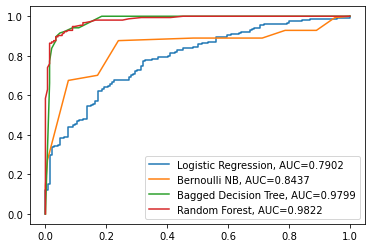

In [96]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
gs = LogisticRegression()
gs.fit(X_train, y_train)
y_pred = gs.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit Bernoulli NB and plot ROC curve
br = BernoulliNB()
br.fit(X_train, y_train)
y_pred = br.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Bernoulli NB, AUC="+str(auc))

#fit Bagged Decision Tree and plot ROC curve
bag = BaggingClassifier(random_state = 42)
bag.fit(X_train, y_train)
y_pred = bag.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Bagged Decision Tree, AUC="+str(auc))

#fit Random forest and plot ROC curve
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))


#add legend
plt.legend();


### Conclusion and Recommendations

| | Model | Training Accuracy Score  | Testing Accuracy Score | Correctly Classified |Misclassified| AUC|
|---:|:-------------|:-----------|:------|:------|:----------|:---------|
| 1 | Logistic Regression | 0.963  | 0.930  | 945  | 71|0.7902|
| 2 | Bernoulli Naive Bayes | 0.974  | 0.948 | 971 | 54|0.8437|
| 3 | Bagged Decision Tree | 0.991|0.895|918|107|0.9799|
| 4 | Random forest |0.998|0.913|936|89|0.9822|



All the classification models: Logistic Regression, Bernoulli Naive Bayes, Bagged Decision Tree, and Random Forest surpassed the baseline accuracy. 

**Bernoulli Naive Bayes Classification Model** was the best model to test our training data because it was able to manage well with unknown data according to the testing accuracy score. Despite having lower AUC score than both bagged decision tree and random forest.

However, the model was still overfit because of low bias and high variance.

Despite the overfitting, this model was able to classified similar content from two different web sources: r/mbti and r/astrology. Also it was able to identify where each post came from which subreddit. It had one of the highest in correctly classifying posts which was 971. Therefore, Reddit will be able to implement this model for their studies on this data science topic.

Yet, this model still had its limitations. Some of the posts had similar titles and incorrect spelling. It was not able to identify these mishaps because of NLP transformer. In other words, both of these mishaps could of swayed our model results.

Also, our model can improve it's accuracy if we further tuned our hyperparameters. Additionally, we could of instantiate the PolynomialFeatures before our model to decrease the overfitting.

So we still have some recommendations:

- increase the stopword list with more nouns to have a better predictable model (i.e. ‘like’)
- Each of the subreddits change over time. thus the result might change
- a different model that we had not yet modeled (i.e SLM, Adaboost)